# Preamble

In [1]:
import pandas as pd # Library that allows us to manipulate data
from matplotlib import pyplot as plt #Library that allows us to produce plots/graphs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #Allows to Graph the AC Function
from statsmodels.tsa.stattools import adfuller #Augmented Dickey Fuller Test
import warnings
warnings.filterwarnings('ignore')
import numpy as np # Math - Functions
from statsmodels.tsa.ar_model import AutoReg


In [ ]:
df= pd.read_csv('perrin-freres-monthly-champagne-.csv',index_col =0,parse_dates=True)

In [3]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [4]:

df = df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'})
df

,Sales
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0
...,...
1972-07,4298.0
1972-08,1413.0
1972-09,5877.0


In [5]:
df.shape

(107, 1)

In [6]:
df = df.dropna()

<Axes: xlabel='Month'>

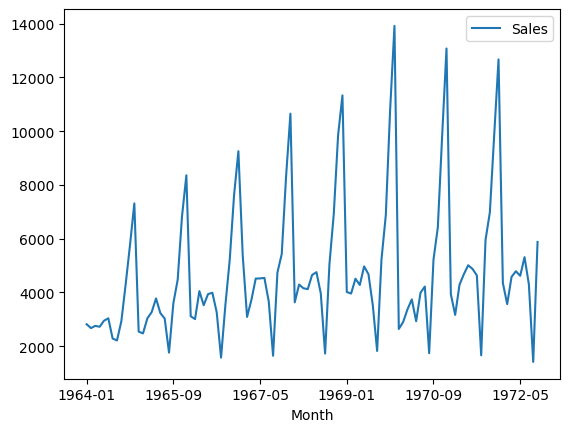

In [7]:
#checking stationarity
df.plot()

<Axes: xlabel='Month'>

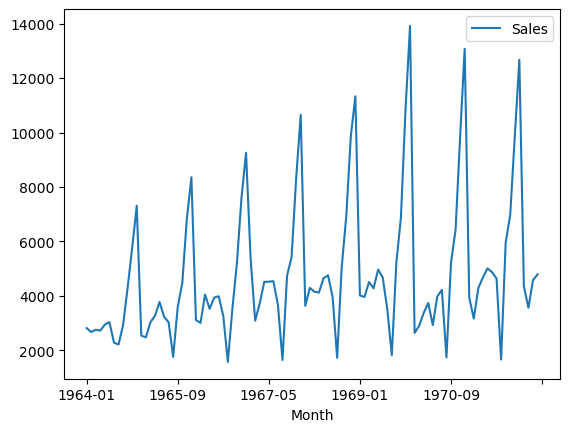

In [8]:
#plotting first hundred values
df[:100].plot()

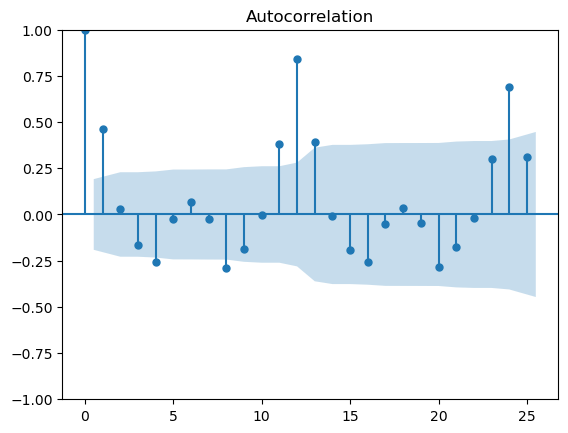

In [9]:
plot_acf(df['Sales'], lags =25)
plt. show ()

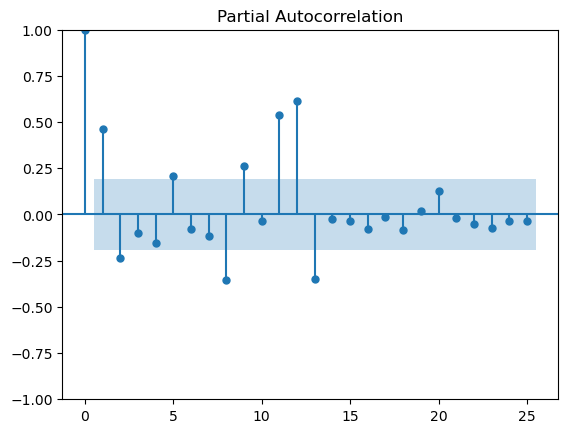

In [10]:
plot_pacf(df['Sales'], lags =25)
plt. show ()

In [11]:
#performing an Augmented Dickey Fuller Test
adftest = adfuller(df['Sales'], autolag = 'AIC',
regression = 'CT')
print ("ADF Test Results ")
print (" Null Hypothesis : The series has an UnitRoot ")
print ("ADF - Statistic :", adftest [0])
print ("P- Value :", adftest [1])
print (" Number of lags :", adftest [2])
print (" Number of observations :", adftest [3])
print (" Critical Values ", adftest [4])
print (" Note : If P- Value is smaller than 0.05 , wereject the null Hypothesis and our series is Stationary ")

ADF Test Results 
 Null Hypothesis : The series has an UnitRoot 
ADF - Statistic : -1.035721739773774
P- Value : 0.9391110077603649
 Number of lags : 11
 Number of observations : 93
 Critical Values  {'1%': -4.059568800656923, '5%': -3.4587997574833063, '10%': -3.1553337836930617}
 Note : If P- Value is smaller than 0.05 , wereject the null Hypothesis and our series is Stationary 


# Observation 
Series is not Stationary

In [12]:
#Transforming the Series into a stationary one
#Apply Logs, Differences and then multiply x100 = Sales Growth (%Change)

In [13]:
#applying logs
df['Sales_logs'] = np.log(df['Sales'])

In [14]:
#applying first differences, you can use the shift function as well
df["Sales_diff"] = df['Sales_logs'].diff()

In [15]:
df

,Sales,Sales_logs,Sales_diff
Month,,,
1964-01,2815.0,7.942718,NaN
1964-02,2672.0,7.890583,-0.052135
1964-03,2755.0,7.921173,0.030590
1964-04,2721.0,7.908755,-0.012418
1964-05,2946.0,7.988204,0.079449
...,...,...,...
1972-05,4618.0,8.437717,-0.036151
1972-06,5312.0,8.577724,0.140007
1972-07,4298.0,8.365905,-0.211819


In [16]:
# since data is seasonal, we just cannot end at the first difference
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
df

,Sales,Sales_logs,Sales_diff,Seasonal First Difference
Month,,,,
1964-01,2815.0,7.942718,NaN,NaN
1964-02,2672.0,7.890583,-0.052135,NaN
1964-03,2755.0,7.921173,0.030590,NaN
1964-04,2721.0,7.908755,-0.012418,NaN
1964-05,2946.0,7.988204,0.079449,NaN
...,...,...,...,...
1972-05,4618.0,8.437717,-0.036151,-392.0
1972-06,5312.0,8.577724,0.140007,438.0
1972-07,4298.0,8.365905,-0.211819,-335.0


In [17]:
#perfprming an Augmented Dickey Fuller Test
adftest = adfuller(df['Seasonal First Difference'].dropna(), autolag = 'AIC',
regression = 'CT')
print ("ADF Test Results ")
print (" Null Hypothesis : The series has an UnitRoot ")
print ("ADF - Statistic :", adftest [0])
print ("P- Value :", adftest [1])
print (" Number of lags :", adftest [2])
print (" Number of observations :", adftest [3])
print (" Critical Values ", adftest [4])
print (" Note : If P- Value is smaller than 0.05 , wereject the null Hypothesis and our series is Stationary ")

ADF Test Results 
 Null Hypothesis : The series has an UnitRoot 
ADF - Statistic : -7.842326096994984
P- Value : 1.6539400078016935e-10
 Number of lags : 0
 Number of observations : 92
 Critical Values  {'1%': -4.060704239900962, '5%': -3.4593375892783755, '10%': -3.1556468172104877}
 Note : If P- Value is smaller than 0.05 , wereject the null Hypothesis and our series is Stationary 


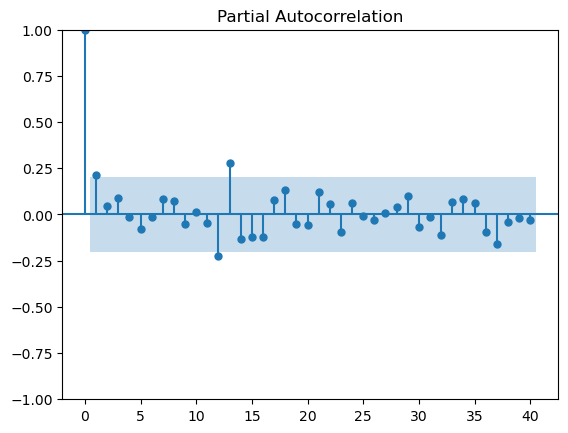

In [18]:
# p value is less than 0.005 hence we  reject the null hypothesis
plot_pacf(df['Seasonal First Difference'].dropna(), lags =40)
plt. show ()

<Axes: xlabel='Month'>

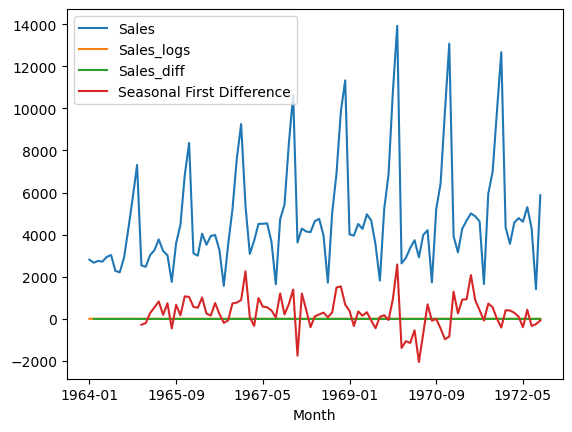

In [19]:
df.plot()

In [20]:
#figuring out the order 
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Seasonal First Difference'].dropna(), 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   93
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -746.227
Date:                Tue, 08 Oct 2024   AIC                           1498.453
Time:                        03:57:17   BIC                           1506.051
Sample:                    01-01-1965   HQIC                          1501.521
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    228.9560     83.776      2.733      0.006      64.758     393.154
ar.L1          0.2125      0.072      2.964      0.003       0.072       0.353
sigma2      5.481e+05   6.04e+04      9.068      0.000     4.3e+05    6.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.79
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                            -0.16
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
#determining the best ARIMA model order
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Sales'].dropna(), 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -966.875
Date:                Tue, 08 Oct 2024   AIC                           1935.750
Time:                        03:57:18   BIC                           1938.394
Sample:                    01-01-1964   HQIC                          1936.821
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.895e+06   5.29e+05     13.025      0.000    5.86e+06    7.93e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):               139.51
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               4.62   Skew:                            -1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
import statsmodels.api as sm

In [23]:
#model building
model = sm.tsa.arima.ARIMA(df['Sales'], order=(1,0,0),trend='t')
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -965.159
Date:                Tue, 08 Oct 2024   AIC                           1936.319
Time:                        03:57:18   BIC                           1944.281
Sample:                    01-01-1964   HQIC                          1939.545
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            72.4476     10.821      6.695      0.000      51.240      93.655
ar.L1          0.6180      0.062      9.990      0.000       0.497       0.739
sigma2      5.628e+06   7.28e+05      7.734      0.000     4.2e+06    7.05e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                18.94
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

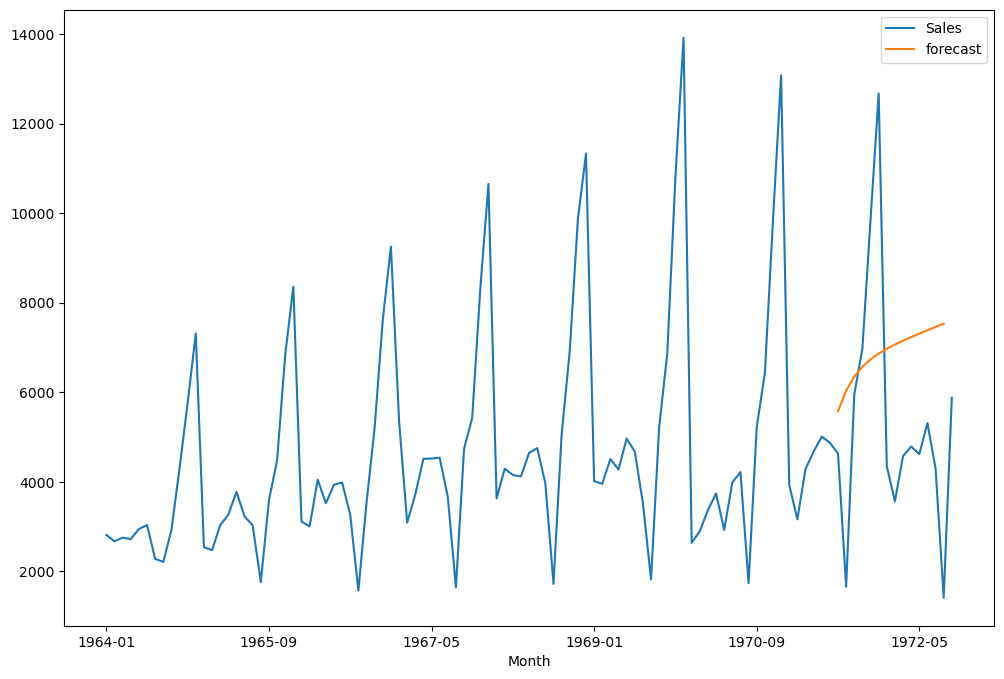

In [24]:
df['forecast']=result.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))


In [25]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(0, 1, 0),seasonal_order=(1,0,0,12))
results=model.fit()

<Axes: xlabel='Month'>

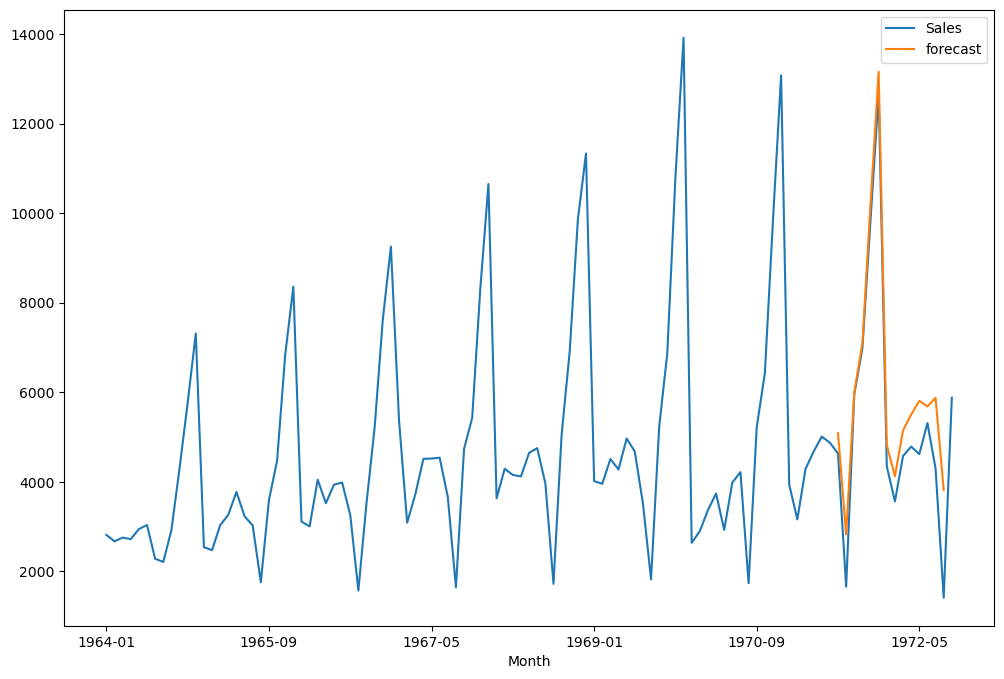

In [26]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [44]:
from pandas.tseries.offsets import DateOffset

# Creating future dates for the next 24 months starting from the last available date in df
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(1,25)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,Sales,Sales_logs,Sales_diff,Seasonal First Difference,forecast
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN
1974-09-01,NaN,NaN,NaN,NaN,NaN


In [45]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

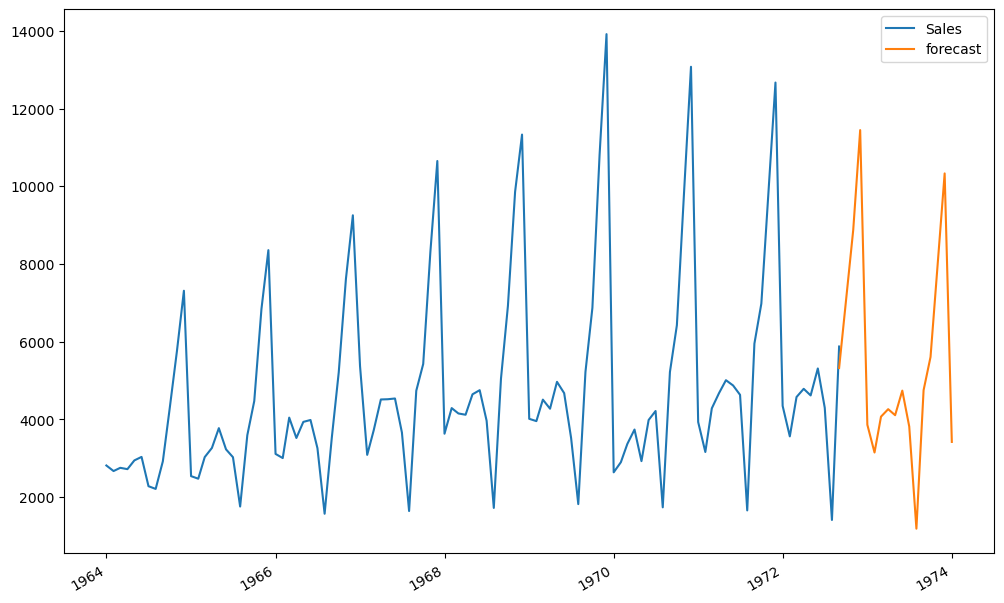

In [46]:
# Predicting future values using the model and store the predictions in the 'forecast' column of future_df
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 